In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [5]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
# print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [6]:
# reading the dataset

data = pd.read_csv('store_transaction.csv', header = None)

# let's check the shape of the dataset
data.shape

(7501, 20)

In [7]:
import pandas

In [8]:
# checking the head of the data

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# checkng the tail of the data

data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# checking the random entries in the data

data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1882,ham,frozen vegetables,energy bar,whole weat flour,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3915,ground beef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,burgers,black tea,eggs,whole wheat rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2606,mineral water,avocado,meatballs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,herb & pepper,eggs,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
922,parmesan cheese,whole wheat rice,escalope,champagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6245,burgers,ground beef,spaghetti,mineral water,french fries,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,mineral water,meatballs,olive oil,muffins,whole wheat rice,yogurt cake,light mayo,salt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5646,burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# let's describe the dataset

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [12]:
all_elements = data.values.tolist()
flat_list = [item for sublist in all_elements for item in sublist]
cleanedList = [x for x in flat_list if str(x) != 'nan']
temp_df = pd.DataFrame({'col':cleanedList})

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

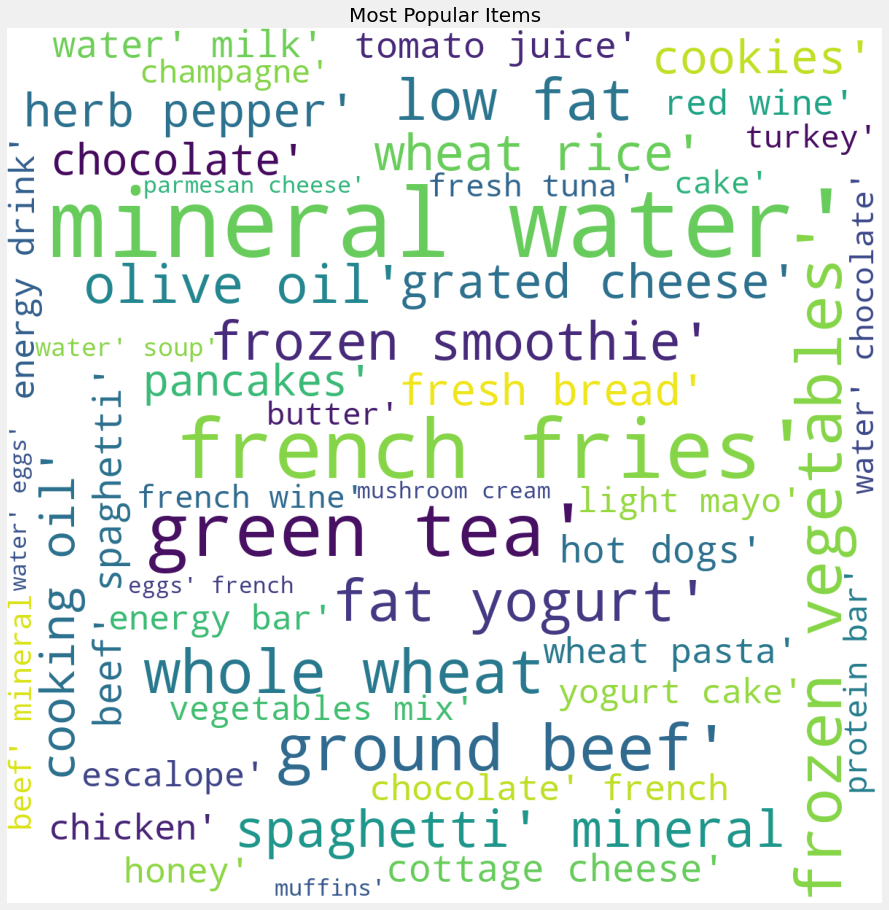

In [16]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 50).generate(str(cleanedList))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

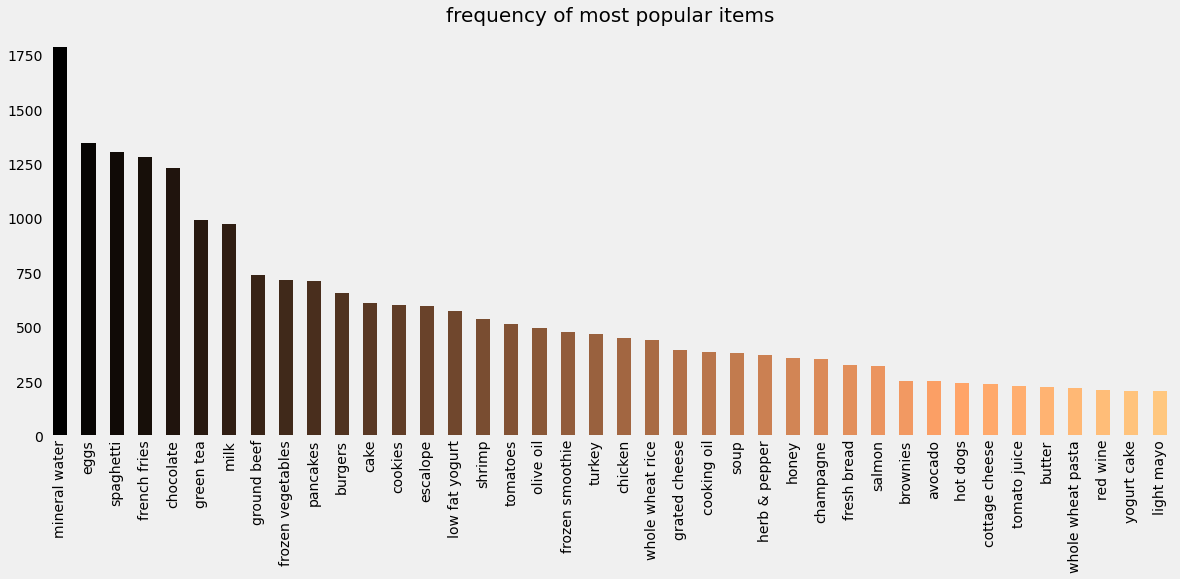

In [17]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
temp_df['col'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

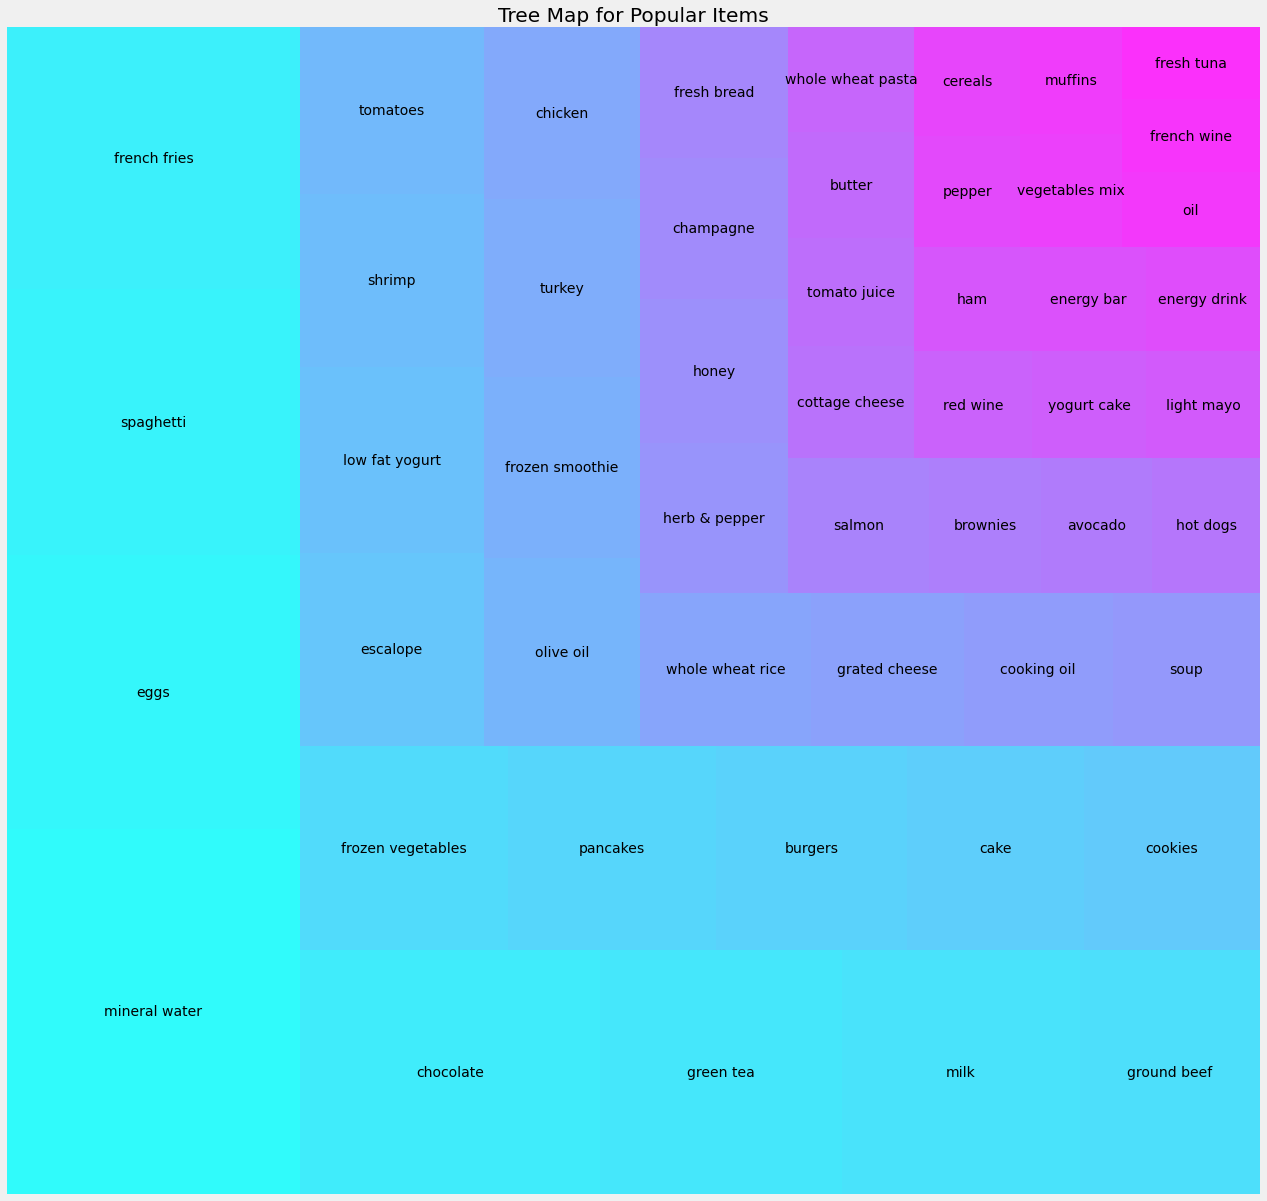

In [18]:
y = temp_df['col'].value_counts().head(50).to_frame()

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [19]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [27]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# To know more about TransactionEncoder go to  http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary
te_ary.astype("int")

pd.DataFrame(te_ary, columns=te.columns_)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [21]:
del data['nan']

In [28]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 1% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
510,0.011065,"(milk, mineral water, ground beef, nan)"
511,0.017064,"(mineral water, spaghetti, ground beef, nan)"
512,0.015731,"(milk, mineral water, spaghetti, nan)"
513,0.010265,"(mineral water, spaghetti, nan, olive oil)"


In [62]:
frequent_itemsets = apriori(data, min_support = 0.112, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.163845,(chocolate),1
1,0.179709,(eggs),1
2,0.170911,(french fries),1
3,0.132116,(green tea),1
4,0.129583,(milk),1
5,0.238368,(mineral water),1
6,0.999867,(nan),1
7,0.174110,(spaghetti),1
8,0.163845,"(chocolate, nan)",2
9,0.179709,"(eggs, nan)",2


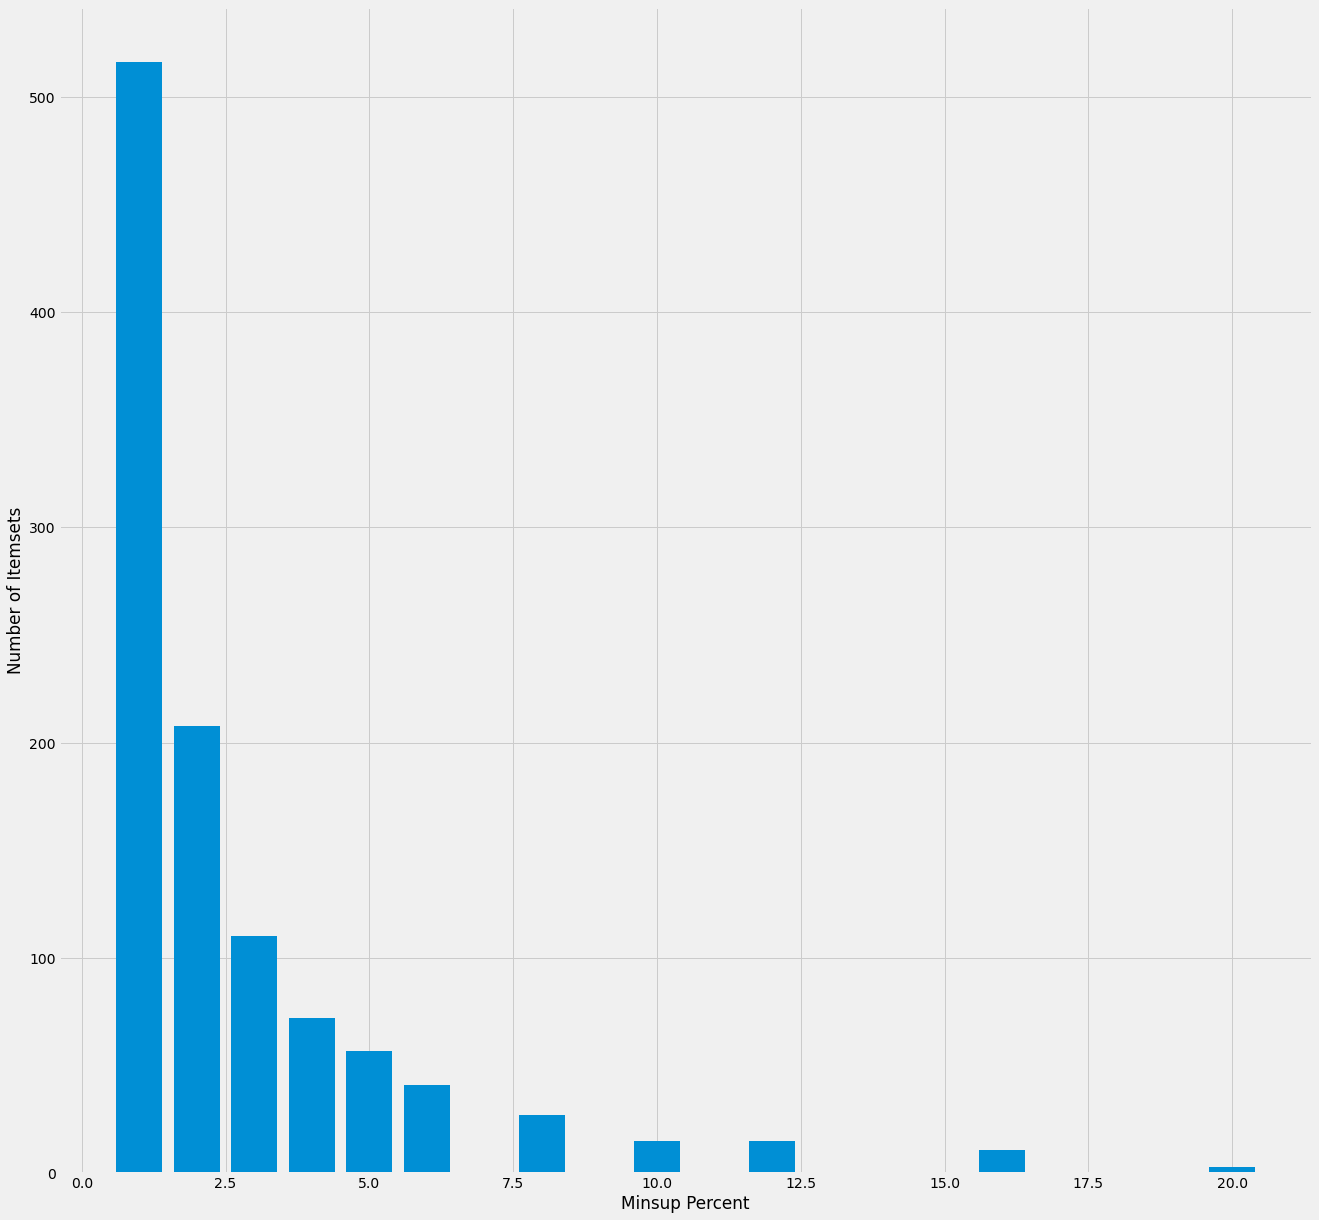

In [63]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,8,10,12,16,20]
y = [516,208,110,72,57,41,27,15,15,11,3]

plt.xlabel("Minsup Percent")
plt.ylabel("Number of Itemsets")

plt.bar(x,y)
plt.show()

In [47]:
# getting th item sets with length = 2 and support more han 1%
support_threhold = 0.01
length = 2

frequent_itemsets = apriori(data, min_support = support_threhold, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ])
print (frequent_itemsets[(frequent_itemsets['length'] == length) &
                   (frequent_itemsets['support'] >= support_threhold) ].shape)

      support                       itemsets  length
76   0.020264                 (almonds, nan)       2
77   0.011598       (avocado, mineral water)       2
78   0.033196                 (avocado, nan)       2
79   0.010799          (barbecue sauce, nan)       2
80   0.014265               (black tea, nan)       2
..        ...                            ...     ...
311  0.011199             (tomatoes, shrimp)       2
312  0.014265              (spaghetti, soup)       2
313  0.020931          (spaghetti, tomatoes)       2
314  0.016531            (spaghetti, turkey)       2
315  0.014131  (spaghetti, whole wheat rice)       2

[240 rows x 3 columns]
(240, 3)


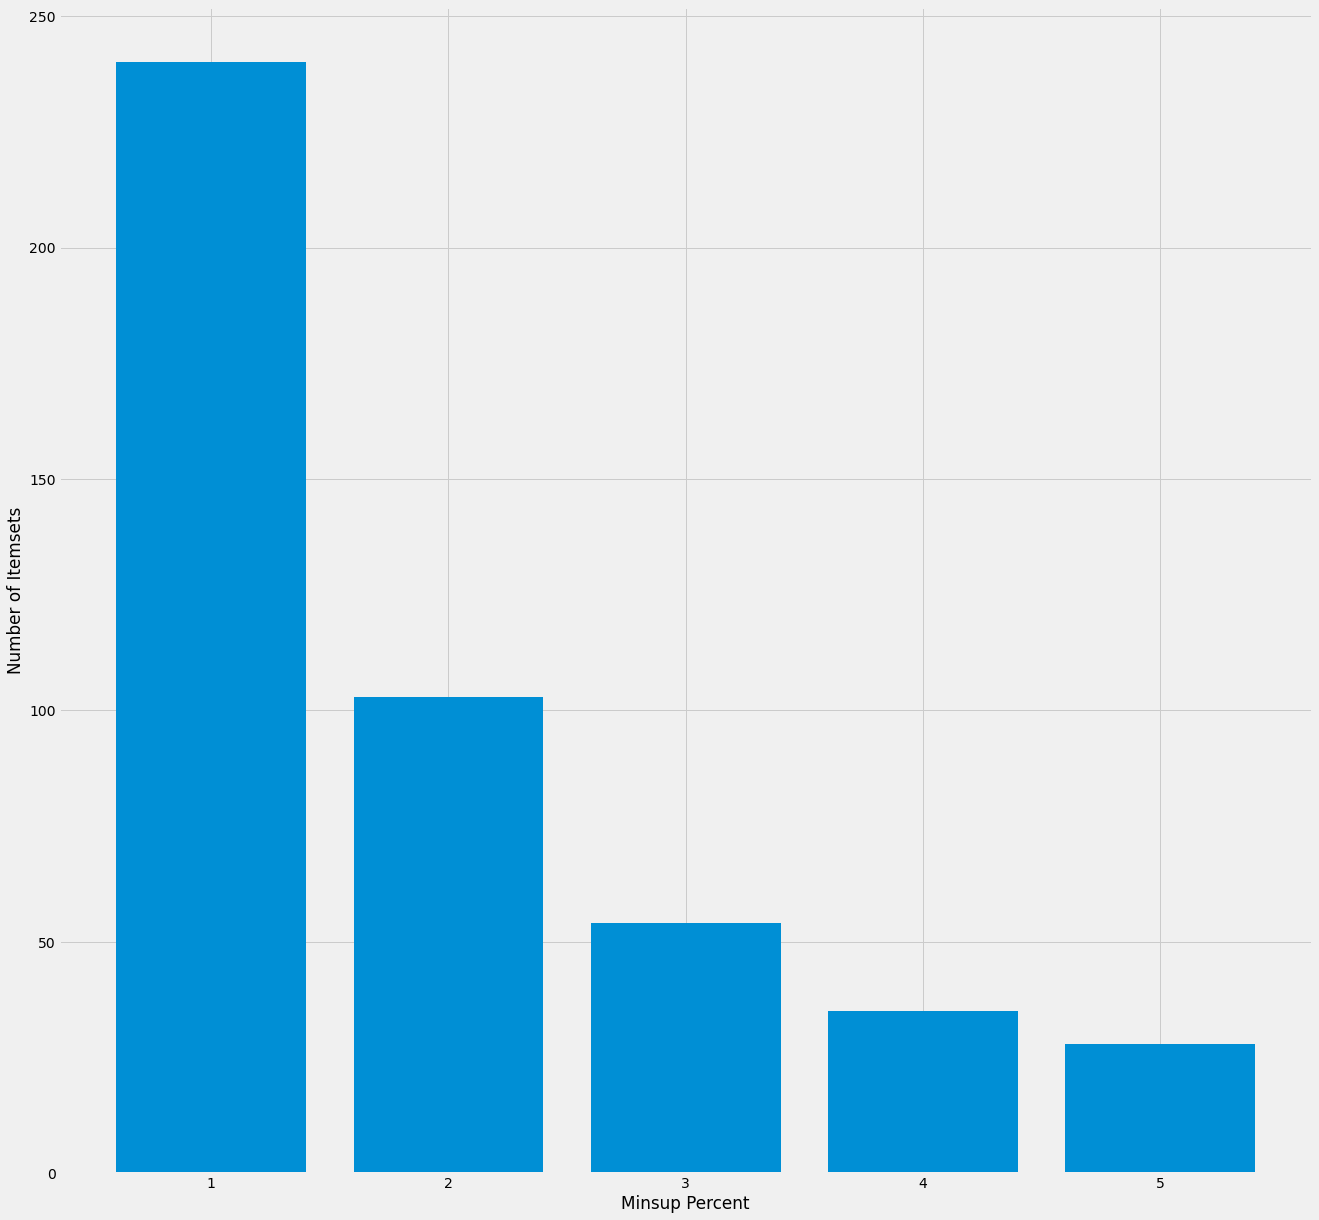

In [64]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [240,103,54,35,28]

plt.xlabel("Minsup Percent")
plt.ylabel("Number of Itemsets")

plt.bar(x,y)
plt.show()

In [31]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'mineral water'}]

,support,itemsets,length
46,0.238368,(mineral water),1


In [32]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'eggs'}]

,support,itemsets,length
19,0.179709,(eggs),1


In [33]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate', 'mineral water'}]

,support,itemsets,length
132,0.05266,"(mineral water, chocolate)",2


In [65]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'chocolate'}]

,support,itemsets,length
0,0.163845,(chocolate),1


In [67]:
frequent_itemsets[frequent_itemsets['itemsets'] == {'mineral water', 'eggs'}]

,support,itemsets,length
